In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("E:/EBAC/Material/M18")

drugs = pd.read_csv("drugs.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [15]:
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = drugs[feature_cols].values
y = drugs.Drug

In [30]:
from sklearn import preprocessing

Cod_Sex = preprocessing.LabelEncoder()
Cod_Sex.fit(np.unique(X[:,1]))
X[:,1] = Cod_Sex.transform(X[:,1])

Cod_BP = preprocessing.LabelEncoder()
Cod_BP.fit(np.unique(X[:,2]))
X[:,2] = Cod_BP.transform(X[:,2])

Cod_Cholesterol = preprocessing.LabelEncoder()
Cod_Cholesterol.fit(np.unique(X[:,3]))
X[:,3] = Cod_Cholesterol.transform(X[:,3])

In [31]:
# Convertimos los valores de y o los medicamentos en valores 0 y 1 donde 0 representa que es medicamento nacional y 1 extrangero

y = y.apply(lambda x: 0 if x in ["drugA", "drugB", "drugC"] else 1)


In [17]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [18]:
y[0:5]

0    1
1    0
2    0
3    1
4    1
Name: Drug, dtype: int64

In [19]:
# Creación de grupos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Regresión logística con Solucionador (Solver): sag

In [20]:
model = LogisticRegression(solver="sag")
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos (Betas)", clf.coef_)
print("--------------------------------------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("--------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))


Intercepto (Beta 0) [-0.30516415]
Pesos (Betas) [[-0.03191764 -0.12809691  0.92475183  0.25650588  0.140862  ]]
--------------------------------------------------------------------------------------
Precisión global:  0.9166666666666666
--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.90      1.00      0.95        46

    accuracy                           0.92        60
   macro avg       0.95      0.82      0.87        60
weighted avg       0.92      0.92      0.91        60



# Regresión logística con Solucionador (Solver): newton-cg

In [21]:
model = LogisticRegression(solver="newton-cg")
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos (Betas)", clf.coef_)
print("--------------------------------------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("--------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))


Intercepto (Beta 0) [-10.93095231]
Pesos (Betas) [[0.01389073 0.13791913 3.1415303  2.16151537 0.60541547]]
--------------------------------------------------------------------------------------
Precisión global:  0.9833333333333333
--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.98      1.00      0.99        46

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.98        60
weighted avg       0.98      0.98      0.98        60



# Regresión logística con Solucionador (Solver): liblinear

In [22]:
model = LogisticRegression(solver="liblinear")
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos (Betas)", clf.coef_)
print("--------------------------------------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("--------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Intercepto (Beta 0) [-3.22816315]
Pesos (Betas) [[-0.02274502 -0.22931494  1.92536996  1.18113954  0.24969711]]
--------------------------------------------------------------------------------------
Precisión global:  0.9833333333333333
--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.98      1.00      0.99        46

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.98        60
weighted avg       0.98      0.98      0.98        60



# Regresión logística con Solucionador (Solver): saga

In [23]:
model = LogisticRegression(solver="saga")
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos (Betas)", clf.coef_)
print("--------------------------------------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("--------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Intercepto (Beta 0) [-0.14404599]
Pesos (Betas) [[-0.02837256 -0.07119854  0.57972742  0.13745704  0.13610166]]
--------------------------------------------------------------------------------------
Precisión global:  0.9
--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.88      1.00      0.94        46

    accuracy                           0.90        60
   macro avg       0.94      0.79      0.83        60
weighted avg       0.91      0.90      0.89        60



# Regresión logística con Solucionador (Solver): lbfgs

In [24]:
model = LogisticRegression(solver="lbfgs")
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos (Betas)", clf.coef_)
print("--------------------------------------------------------------------------------------")
score = model.score(X_test, y_test)
print("Precisión global: ", score)
print("--------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Intercepto (Beta 0) [-10.93228778]
Pesos (Betas) [[0.01389594 0.13806129 3.14184245 2.16164754 0.60547626]]
--------------------------------------------------------------------------------------
Precisión global:  0.9833333333333333
--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.98      1.00      0.99        46

    accuracy                           0.98        60
   macro avg       0.99      0.96      0.98        60
weighted avg       0.98      0.98      0.98        60



# Predicciones

Despues de correr este modelo con los diferentes solucionadores, obtenemos que los mejores para este caso son: newton-cg, liblinear y lbfgs dandonos los mismo resultados y scores, con 98% de precision en cada uno.

In [25]:
# Predicción de probabilidades para casos particulares
y_pred_probs = clf.predict_proba(X_test)[:,1]
y_pred_probs[0:5]

array([0.98999607, 0.99966587, 0.99169979, 0.63337611, 0.99999275])

In [26]:
y_test[0:5]

58     1
40     1
34     1
102    0
184    1
Name: Drug, dtype: int64

In [27]:
y_test = y_test.to_numpy()
y_test[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [28]:
# Graficación de la curva ROC y cálculo del área bajo ella
from sklearn.metrics import roc_curve, roc_auc_score

# fpr = false positive rate
# tpt = true positive rate
# thresholds = límites para valores de p
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

Text(0.5, 1.0, 'Curva ROC para Regresión Lógistica')

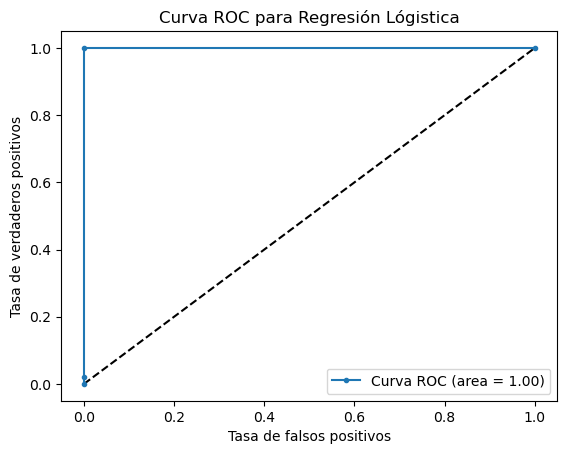

In [29]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker=".", label = "Curva ROC (area = %0.2f)" % auc)
plt.xlabel("Tasa de falsos positivos") # False positive rate
plt.ylabel("Tasa de verdaderos positivos") # True positive rate
plt.legend(loc = "lower right")
plt.title("Curva ROC para Regresión Lógistica")

Mediante esta grafica podemos ver que los resultados de las predicciones fueron completamente certeros al compararlos con los valores reales obteniendo la maxima area bajo la curva y comprobando que este modelo es confiable para este caso utilizando cualquiera de los solucionadores newton-cg, liblinear o lbfgs